In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

dados = pd.read_csv('dados_processados.csv', encoding = 'utf-8')
dias_semana = pd.read_csv('dias_semana.csv', encoding = 'latin1')

In [278]:
def converter_tempo(tempo):
    horas = re.search(r'(\d+)h', tempo)
    minutos = re.search(r'(\d+)m', tempo)
    segundos = re.search(r'(\d+)s', tempo)
    
    horas = int(horas.group(1)) if horas else 0
    minutos = int(minutos.group(1)) if minutos else 0
    segundos = int(segundos.group(1)) if segundos else 0

    return f'{horas:02}:{minutos:02}:{segundos:02}'

dados['tempo de estudo'] = dados['tempo de estudo'].apply(converter_tempo)
dados['horário de início'] = pd.to_datetime(dados['horário de início'], format = '%H:%M').dt.time
dados['data'] = pd.to_datetime(dados['data'], format = '%Y-%m-%d')
dados = dados[dados['data'] <= pd.Timestamp('2023-03-19')]
dias_semana['data'] = pd.to_datetime(dias_semana['data'], format='%d/%m/%y')
dados = pd.merge(dados, dias_semana, on = 'data', how = 'left')
dados['dia da semana'] = dados['dia da semana'].str.encode('latin1').str.decode('utf-8')

O primeiro dia de estudo, marcado na plataforma Aprovado, foi dia 27/11/2019.

In [85]:
dados['data'].min()

Timestamp('2019-11-27 00:00:00')

O último dia de estudo, marcado na plataforma Aprovado, foi dia 16/03/2023. A data da última prova (SEF-MG) foi no dia 19/03/2023.

In [108]:
dados['data'].max()

Timestamp('2023-03-16 00:00:00')

A quantidade de dias entre o primeiro e o último dia de estudo foi de 1205 dias, ou seja, mais de 3,3 anos (1205/365).

In [110]:
dados['data'].max() - dados['data'].min()

Timedelta('1205 days 00:00:00')

Desde o primeiro dia de estudo, até o último, foram feitas 6.547 atividades.

In [91]:
dados.shape[0]

6547

Essas atividades foram realizadas em 953 dias de efetivo estudo.

In [94]:
dados['data'].nunique()

953

Então, da quantidade de dias totais, em quase 80% dos dias houve atividade de estudo (953/1205 * 100). Em apenas 252 dias não houve nenhuma atividade (1205-953).
Uma coincidência é que 252 é considerada a quantidade média de dias úteis em um ano normal, ou seja, durante esse período, fiquei um ano útil sem estudar.

A quantidade de horas estudadas durante o período foi de 216 dias mais 3h 57m 05s, isto é 5.187h 57m 05s.

In [279]:
dados2 = dados.copy()
dados2['tempo de estudo'] = pd.to_timedelta(dados2['tempo de estudo'])
dados2['tempo de estudo'].sum()

Timedelta('216 days 03:57:05')

As disciplinas estudadas (ou atividades) foram as abaixo.

In [111]:
set(dados['disciplina'])

{'Administração Financeira e Orçamentária',
 'Administração Geral e Pública',
 'Auditoria',
 'Comércio Internacional',
 'Contabilidade Geral e Avançada',
 'Contabilidade Pública',
 'Direito Administrativo',
 'Direito Civil e Direito Comercial',
 'Direito Constitucional',
 'Direito Penal',
 'Direito Previdenciário',
 'Direito Tributário',
 'Discursiva',
 'Economia e Finanças Públicas',
 'Estatística',
 'Exercícios',
 'Legislação',
 'Legislação Aduaneira',
 'Legislação Tributária',
 'Matemática Financeira',
 'Matemática e Raciocínio Lógico',
 'Português',
 'Simulado',
 'Tecnologia da Informação',
 'Ética'}

Dessas disciplinas, as 5 que mais tiveram tempo de estudo foram as abaixo. Legislação Tributária lidera com 32 dias mais 1h 27m 30s, totalizando 769 h 27m 30s

In [222]:
aux = dados2.groupby('disciplina')['tempo de estudo'].sum().reset_index().sort_values(by = 'tempo de estudo', ascending = False)
aux.head()

,disciplina,tempo de estudo
18,Legislação Tributária,32 days 01:27:30
4,Contabilidade Geral e Avançada,30 days 09:52:32
11,Direito Tributário,16 days 17:36:29
6,Direito Administrativo,16 days 05:21:24
7,Direito Civil e Direito Comercial,14 days 06:50:28


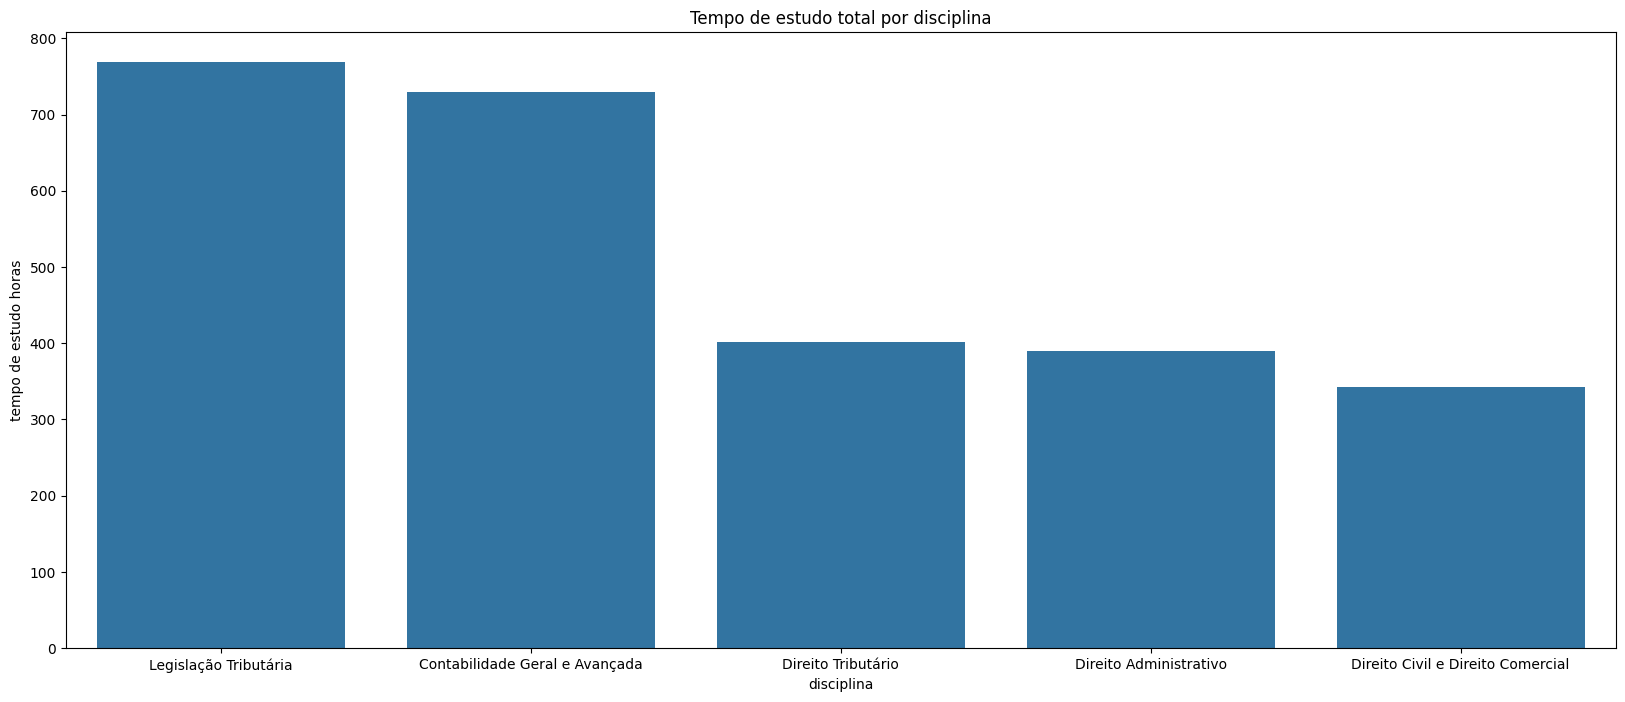

In [223]:
aux['tempo de estudo horas'] = aux['tempo de estudo'].dt.total_seconds() / 3600
plt.figure(figsize = (20, 8))
sns.barplot(data = aux.head(), x = 'disciplina', y = 'tempo de estudo horas')
plt.title('Tempo de estudo total por disciplina')
plt.show() ;

E as 5 disciplinas que mais tiveram atividades registradas foram as abaixo. Legislação Tributária lidera com 955 atividades

In [224]:
aux = dados.groupby('disciplina').size().reset_index(name = 'n').sort_values(by = 'n', ascending = False).head()
aux.head()

,disciplina,n
18,Legislação Tributária,955
4,Contabilidade Geral e Avançada,930
11,Direito Tributário,630
6,Direito Administrativo,542
8,Direito Constitucional,466


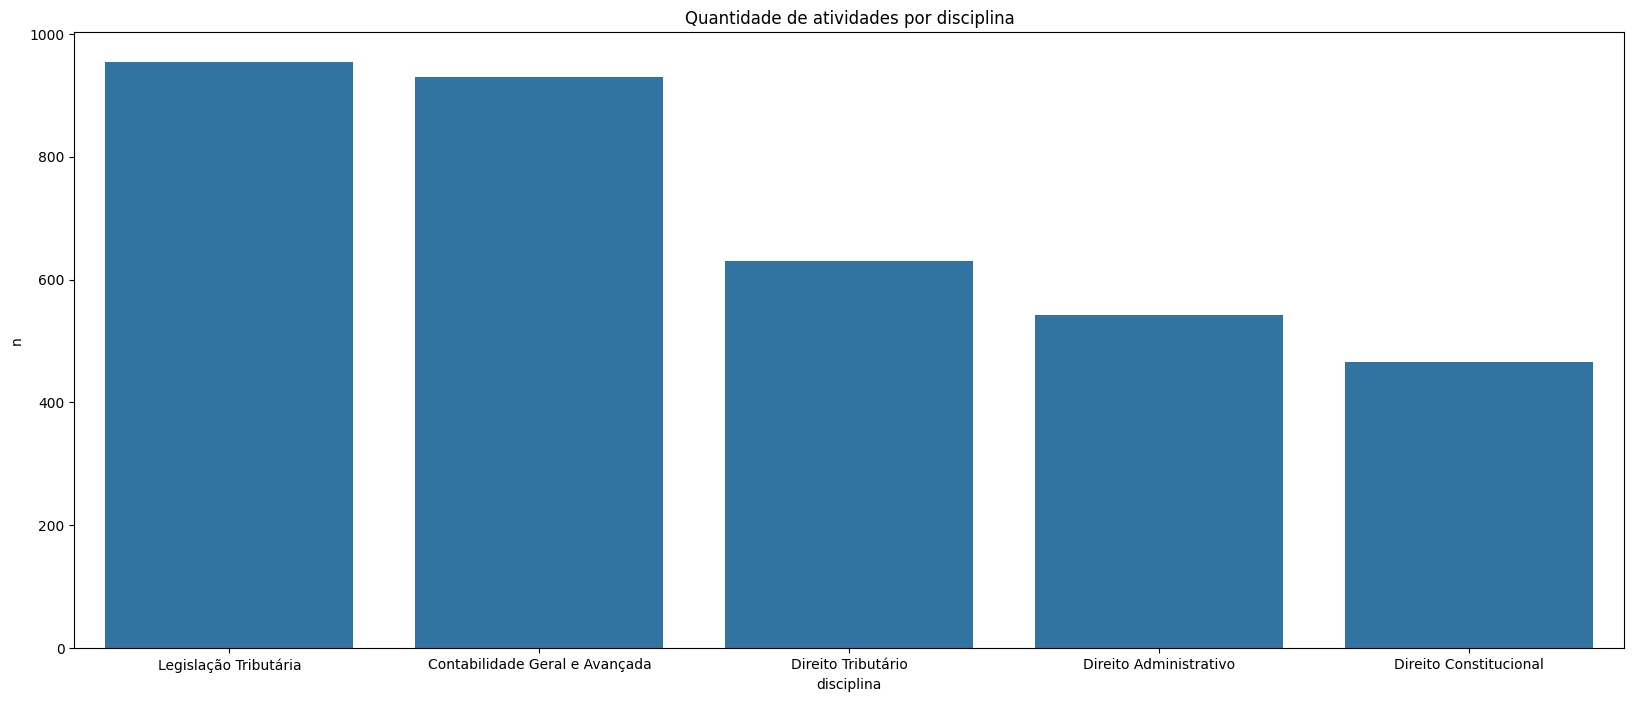

In [225]:
plt.figure(figsize = (20, 8))
sns.barplot(data = aux.head(), x = 'disciplina', y = 'n')
plt.title('Quantidade de atividades por disciplina')
plt.show() ;

Aliás, as médias do tempo de estudo das disciplinas, desconsidando as disciplinas (atividades) com nome Simulado e Exercícios, foram as abaixo. Elas mostram que a minha tentativa de fazer atividades entre 50 minutos e 1 hora de duração, para daí fazer um intervalo e passar para a próxima disciplina, foi consistente. Algumas médias estão abaixo desse tempo porque realizei atividades de menor duração durante as consultorias da LS Concursos e Guruja Concursos.

In [130]:
dados2[~dados2['disciplina'].isin(['Simulado', 'Exercícios'])].groupby('disciplina')['tempo de estudo'].mean().reset_index().sort_values(
    by = 'tempo de estudo', ascending = False)

,disciplina,tempo de estudo
13,Economia e Finanças Públicas,0 days 00:59:20.100877192
21,Tecnologia da Informação,0 days 00:59:09.215231788
0,Administração Financeira e Orçamentária,0 days 00:55:39.579487179
16,Legislação Aduaneira,0 days 00:53:41.250000
3,Comércio Internacional,0 days 00:53:03.750000
14,Estatística,0 days 00:52:03.005050505
18,Matemática Financeira,0 days 00:51:58.373983739
19,Matemática e Raciocínio Lógico,0 days 00:51:09.524324324
7,Direito Civil e Direito Comercial,0 days 00:50:02.987834549
1,Administração Geral e Pública,0 days 00:49:00.037037037


A quantidade de dias em que comecei a estudar antes das 7h da manhã foi de 264 (27,70% do total = 264/953 * 100).

In [220]:
aux = dados.groupby('data')['horário de início'].min().reset_index()
aux['início cedo'] = aux['horário de início'].apply(lambda x: 1 if x <= pd.to_datetime('07:00:00', format = '%H:%M:%S').time() else 0)
aux['início cedo'].value_counts().reset_index(name = 'n')

,início cedo,n
0,0,689
1,1,264


A quantidade de horas estudadas por dia da semana pode ser observada abaixo:

In [294]:
aux = dados2.groupby('dia da semana')['tempo de estudo'].sum().reset_index()

dias_ordenados = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
aux['dia da semana'] = pd.Categorical(aux['dia da semana'], categories = dias_ordenados, ordered = True)
aux = aux.sort_values(by = 'dia da semana').reset_index(drop = True)
aux

,dia da semana,tempo de estudo
0,segunda-feira,32 days 21:10:22
1,terça-feira,34 days 13:21:05
2,quarta-feira,32 days 19:36:28
3,quinta-feira,31 days 13:46:05
4,sexta-feira,27 days 23:19:27
5,sábado,29 days 03:47:03
6,domingo,27 days 04:56:35


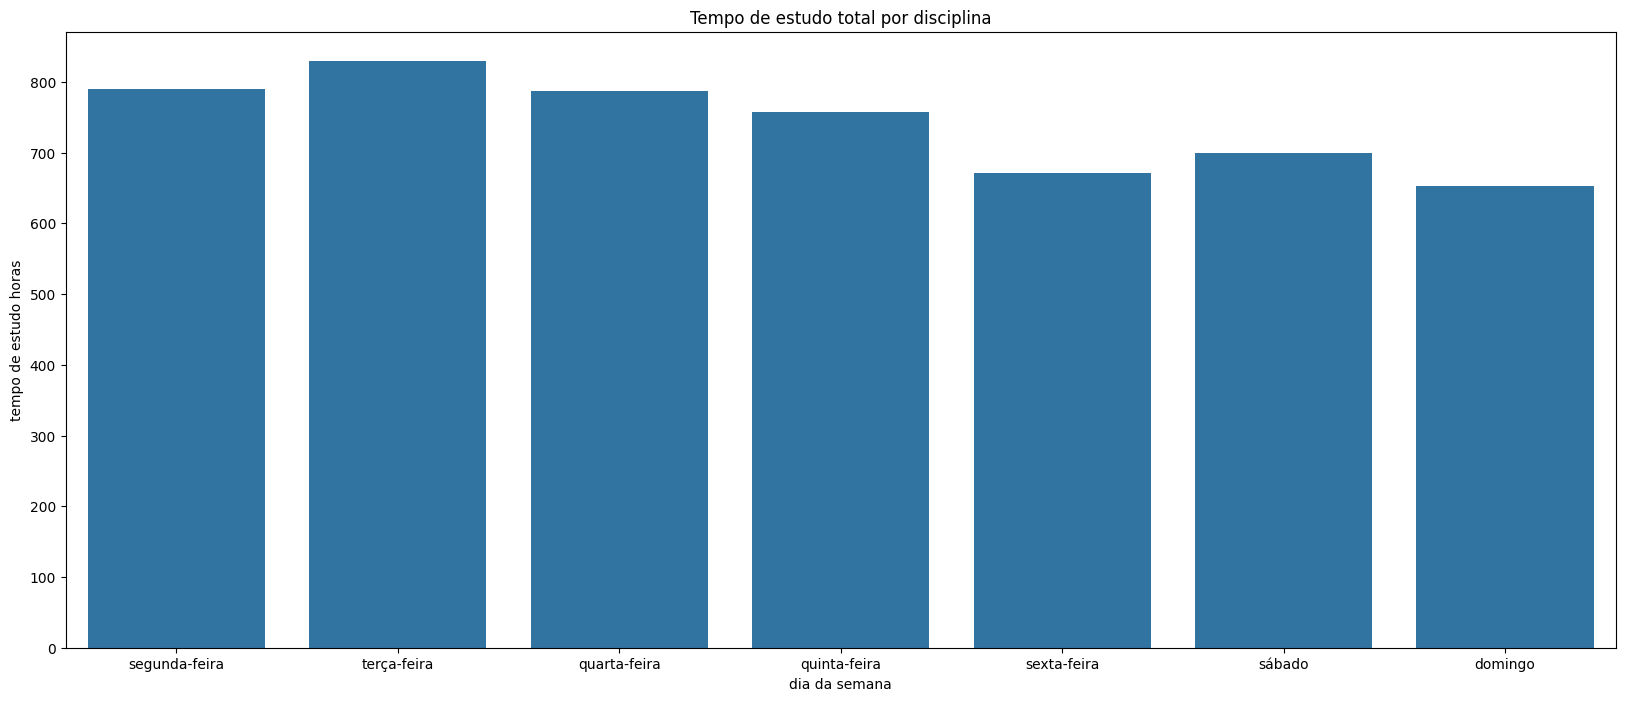

In [292]:
aux['tempo de estudo horas'] = aux['tempo de estudo'].dt.total_seconds() / 3600
plt.figure(figsize = (20, 8))
sns.barplot(data = aux, x = 'dia da semana', y = 'tempo de estudo horas')
plt.title('Tempo de estudo total por disciplina')
plt.show() ;

A quantidade média de horas estudadas por dia da semana.

In [311]:
aux = dados2.groupby(['data', 'dia da semana'])['tempo de estudo'].sum().reset_index()
aux1 = aux.groupby('dia da semana')['tempo de estudo'].mean().reset_index()
aux1['dia da semana'] = pd.Categorical(aux1['dia da semana'], categories = dias_ordenados, ordered = True)
aux1 = aux1.sort_values(by = 'dia da semana').reset_index(drop = True)
aux1

,dia da semana,tempo de estudo
0,segunda-feira,0 days 05:38:13.014285714
1,terça-feira,0 days 05:45:33.784722222
2,quarta-feira,0 days 05:35:09.134751773
3,quinta-feira,0 days 05:24:45.464285714
4,sexta-feira,0 days 05:02:51.180451127
5,sábado,0 days 05:30:36.401574803
6,domingo,0 days 05:06:04.023437500


Quantidade média de horas líquidas estudadas da publicação do edital para o ISS-Aju até a publicação do edital para a SEFAZ-ES.

In [177]:
aux = dados2[(dados2['data'] >= pd.Timestamp('2020-08-14')) & (dados2['data'] < pd.Timestamp('2021-06-10'))].copy()
aux1 = aux.groupby('data')['tempo de estudo'].sum().reset_index()
aux1['tempo de estudo'].mean()

Timedelta('0 days 06:58:03.171821305')

Quantidade média de horas líquidas estudadas da publicação do edital para a SEFAZ-ES até a prova.

In [165]:
aux = dados2[(dados2['data'] >= pd.Timestamp('2021-06-10')) & (dados2['data'] < pd.Timestamp('2021-08-29'))].copy()
aux1 = aux.groupby('data')['tempo de estudo'].sum().reset_index()
aux1['tempo de estudo'].mean()

Timedelta('0 days 07:42:43.166666666')

Quantidade média de horas líquidas estudadas da publicação do edital para o ISS-Aju até a prova da SEFAZ-ES (período em que somente estudava, não trabalhava).

In [178]:
aux = dados2[(dados2['data'] >= pd.Timestamp('2020-08-14')) & (dados2['data'] < pd.Timestamp('2021-08-29'))].copy()
aux1 = aux.groupby('data')['tempo de estudo'].sum().reset_index()
aux1['tempo de estudo'].mean()

Timedelta('0 days 07:07:29.674796747')

Quantidade média de horas líquidas estudadas a partir do momento em que comecei a trabalhar.

In [179]:
aux = dados2[(dados2['data'] >= pd.Timestamp('2021-10-21'))].copy()
aux1 = aux.groupby('data')['tempo de estudo'].sum().reset_index()
aux1['tempo de estudo'].mean()

Timedelta('0 days 04:22:06.595348837')

Quantidade média de horas líquidas estudadas da publicação do edital para o ISS-BH até a prova.

In [180]:
aux = dados2[(dados2['data'] >= pd.Timestamp('2021-11-19')) & (dados2['data'] < pd.Timestamp('2022-03-27'))].copy()
aux1 = aux.groupby('data')['tempo de estudo'].sum().reset_index()
aux1['tempo de estudo'].mean()

Timedelta('0 days 05:09:41.721311475')

Quantidade média de horas líquidas estudadas da publicação do edital para a SEA-SC até a prova.

In [182]:
aux = dados2[(dados2['data'] >= pd.Timestamp('2022-04-08')) & (dados2['data'] < pd.Timestamp('2022-05-22'))].copy()
aux1 = aux.groupby('data')['tempo de estudo'].sum().reset_index()
aux1['tempo de estudo'].mean()

Timedelta('0 days 05:37:18.047619047')

Quantidade média de horas líquidas estudadas da publicação do edital para a SEF-MG até a prova.

In [184]:
aux = dados2[(dados2['data'] >= pd.Timestamp('2022-07-01'))].copy()
aux1 = aux.groupby('data')['tempo de estudo'].sum().reset_index()
aux1['tempo de estudo'].mean()

Timedelta('0 days 03:49:59.488479262')

Quantidade média de horas líquidas estudadas da publicação do edital para a SEF-MG até a prova objetiva.

In [185]:
aux = dados2[(dados2['data'] >= pd.Timestamp('2022-07-01')) & (dados2['data'] < pd.Timestamp('2023-01-08'))].copy()
aux1 = aux.groupby('data')['tempo de estudo'].sum().reset_index()
aux1['tempo de estudo'].mean()

Timedelta('0 days 03:51:09.782051282')

Quantidade média de horas líquidas estudadas da prova objetiva da SEF-MG até a prova discursiva.

In [186]:
aux = dados2[(dados2['data'] >= pd.Timestamp('2023-01-08'))].copy()
aux1 = aux.groupby('data')['tempo de estudo'].sum().reset_index()
aux1['tempo de estudo'].mean()

Timedelta('0 days 03:46:59.721311475')

O gráfico abaixo conta a história de estudo completa. 

No início da minha jornada, estudava durante o último semestre da graduação, não havia constância nos estudos. Na pandemia, mal estudava. No dia 14/08/2020, em meio à pandemia, foi publicado o edital do ISS Aracaju (linha vertical pontilhada azul). A publicação deste edital foi a virada de chave que eu precisava, pois eu achava que não haveria provas na pandemia. Com esta publicação, comecei estudando 10 horas líquidas por dia (não tinha vida). Isso durou 1 ou 2 semanas. Baixei pra 9 horas líquidas diárias, posteriormente para 8 e posteriormente para 7, mantendo este ritmo. A média diária de horas líquidas estudadas do dia 14/08/2020 ao dia 10/06/2021 foi de 6h 58m 03s.

Em determinado momento, resolvi que não faria a prova para Aracaju, pois estava com o percentual de acerto nos simulados abaixo de 65%. Conclui que deveria me manter estudando e faria a próxima prova. Em 10/06/2021 (primeira linha vertical pontilhada vermelha), foi publicado o edital da SEFAZ-ES. Mantive uma boa média diária de horas líquidas estudadas (7h 42m 43s). Neste concurso, um dos mais difíceis, fiquei em 11º na prova objetiva, mas fui eliminado na discursiva.

Após esta prova, diminui a quantidade diária de horas estudadas. No dia 21/10/2021 (linha vertical pontilhada preta), assumi um cargo público na ALE-RS, concurso para o qual tinha alcançado a aprovação em 2018. Houve uma queda significativa na quantidade de horas estudadas (quantidade média de horas líquidas estudadas até o final dos meus estudos caiu para 4h 22m 06s depois que comecei a trabalhar e estudar) até a publicação do edital do concurso para o ISS-BH, no dia 19/11/2021 (primeira linha vertical pontilhada amarela). Desta vez, trabalhando e estudando, mantive uma média de horas líquidas diárias de 5h 09m 41s. Neste concurso, fiquei na posição 50º na classificação final na ampla concorrência. Juntando a lista da ampla concorrência à lista dos cotistas (lista ordenada de classificação para nomeação), estou na posição 74º e até o momento não fui nomeado, mas talvez até o final do prazo de validade (agosto/2026) eu seja.

Entre as linhas verticais pontilhadas em verde (08/04/2022 a 22/05/2022), estudei para o concurso da SEA-SC, tendo uma média de 5h 37m 18s horas líquidas diárias. Neste concurso, fiquei na 4º posição (dentro das vagas) para o cargo de Analista Administrativo II, cargo que assumi em 22/07/2022.

O meu último período de estudo foi do dia 30/06/2022 (linha vertical pontilhada roxa) a 19/03/2023, isto é, da publicação do edital para a SEF-MG até a data da prova discursiva. Até a prova objetiva, a média de horas líquidas estudadas foi de 3h 49m 59s. Da prova objetiva à discursiva, a média de horas líquidas estudadas foi de 3h 51m 09s. A média total de horas estudadas para este concurso foi de 3h 46m 59s. Neste concurso, fiquei na 189º posição (dentro das vagas) para o cargo de Auditor Fiscal de Tributos Estaduais, cargo que assumi em 21/01/2024.

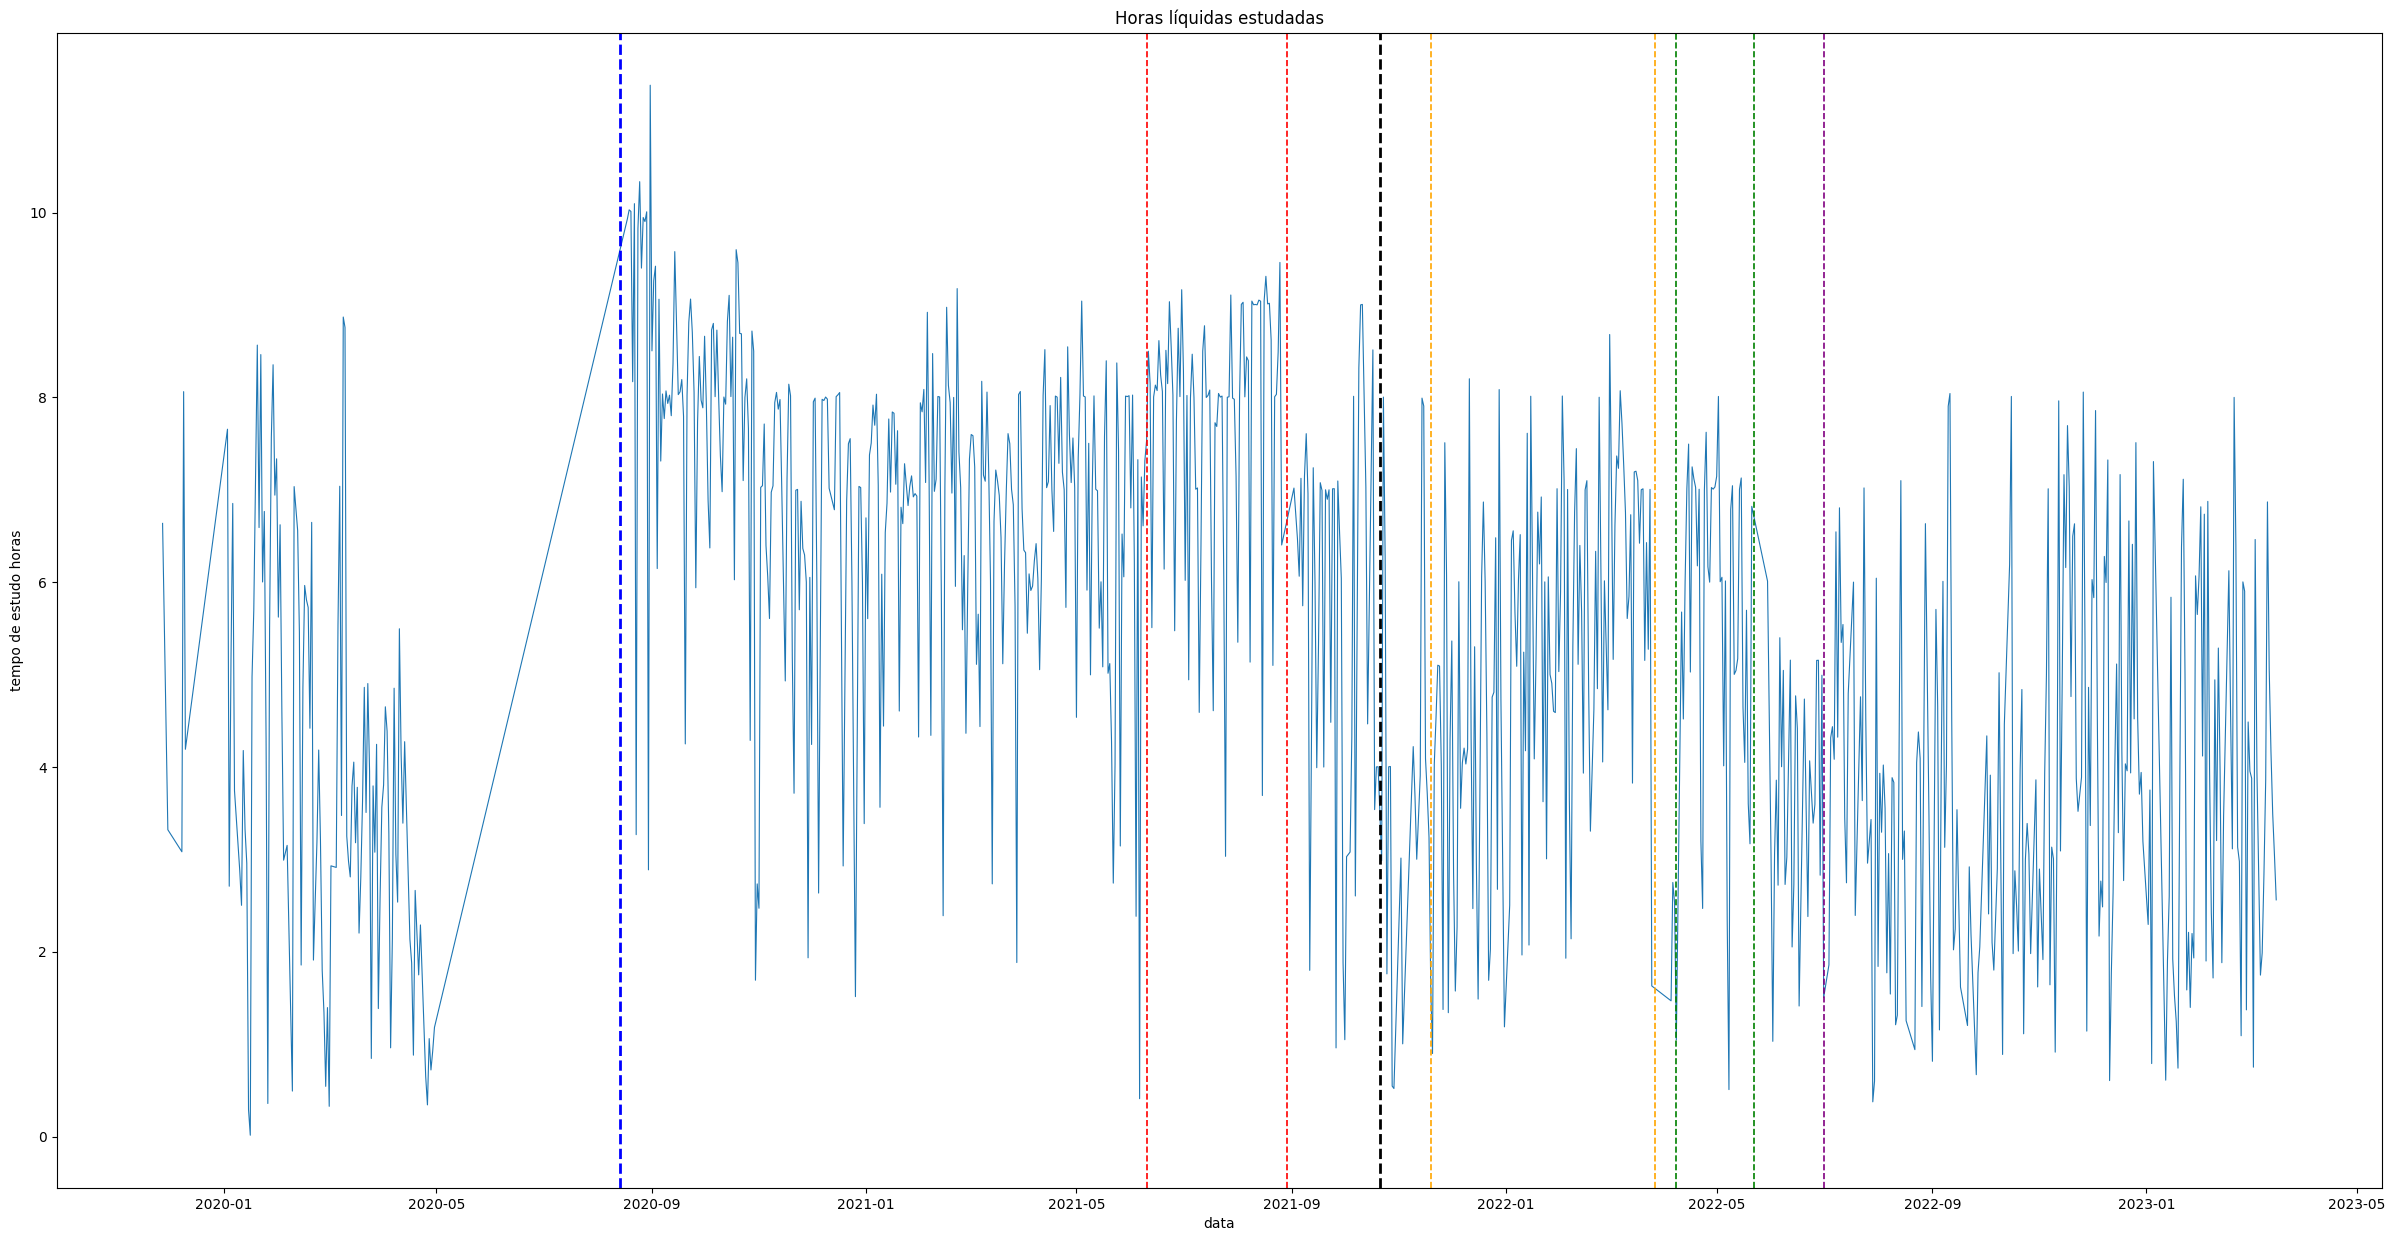

In [312]:
tempo_total = dados2.groupby('data')['tempo de estudo'].sum().reset_index()
tempo_total['tempo de estudo horas'] = tempo_total['tempo de estudo'].dt.total_seconds() / 3600
plt.figure(figsize = (30, 15))
sns.lineplot(data = tempo_total, x='data', y = 'tempo de estudo horas', lw = 0.8)

plt.axvline(pd.Timestamp('2020-08-14'), color = 'blue', linestyle = '--', lw = 2)
plt.axvline(pd.Timestamp('2021-06-10'), color = 'red', linestyle = '--', lw = 1.2)
plt.axvline(pd.Timestamp('2021-08-29'), color = 'red', linestyle = '--', lw = 1.2)
plt.axvline(pd.Timestamp('2021-10-21'), color = 'black', linestyle = '--', lw = 2)
plt.axvline(pd.Timestamp('2021-11-19'), color = 'orange', linestyle = '--', lw = 1.2)
plt.axvline(pd.Timestamp('2022-03-27'), color = 'orange', linestyle = '--', lw = 1.2)
plt.axvline(pd.Timestamp('2022-04-08'), color = 'green', linestyle = '--', lw = 1.2)
plt.axvline(pd.Timestamp('2022-05-22'), color = 'green', linestyle = '--', lw = 1.2)
plt.axvline(pd.Timestamp('2022-07-01'), color = 'purple', linestyle = '--', lw = 1.2)

plt.title('Horas líquidas estudadas')
plt.show()